<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Jornada 7</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Solución Numérica de EDPs: Ecuación de Poisson y Ecuación de Calor
    </p>
</div>

En esta jornada, culminaremos el estudio de la ecuación de Poisson, enfocándonos en su aplicación para calcular el potencial gravitatorio, denotado como $\Phi$. Exploraremos una técnica llamada sobrerelajación, que nos permitirá acelerar la convergencia de la solución, reduciendo así el tiempo de cálculo y aumentando la eficiencia del proceso.

Posteriormente, abordaremos una ecuación en derivadas parciales que incluye la variable temporal: la ecuación de calor. Este tipo de ecuaciones describen fenómenos de difusión y transferencia de energía en sistemas físicos, lo que nos permitirá comprender cómo las soluciones evolucionan a lo largo del tiempo.

<!-- Finalmente, realizaremos un análisis de estabilidad en los métodos numéricos aplicados a estas ecuaciones. Este análisis es fundamental para garantizar que las soluciones numéricas permanezcan precisas y no se desestabilicen, especialmente en simulaciones de largo plazo donde los errores acumulativos pueden afectar la validez de los resultados. -->

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Ecuación de Poisson en 2D**

La ecuación de Poisson describe el comportamiento del potencial gravitatorio $\Phi$ generado por una distribución de masa en el espacio. Se expresa como:

$$
\nabla^2 \Phi = 4 \pi G \rho
$$

donde:

- $\Phi(x, y)$ representa el potencial gravitatorio en función de las coordenadas espaciales $(x, y)$.
- $\rho(x, y)$ es la densidad de masa en el espacio, que puede variar dependiendo de la distribución de masa.
- $G$ es la constante de gravitación universal, que tiene un valor aproximado de $6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$.
- $\nabla^2$ es el operador Laplaciano, que se define en coordenadas cartesianas como:

$$
\nabla^2 \Phi = \frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2}
$$

Esta ecuación establece que el Laplaciano del potencial gravitatorio es proporcional a la densidad de masa. En otras palabras, en las regiones donde la densidad de masa es mayor, el potencial gravitatorio presenta mayores variaciones espaciales, reflejando una influencia gravitatoria más intensa.

**Ejemplo de Aplicación**: Si consideramos una distribución de masa que representa una galaxia espiral, podemos utilizar la ecuación de Poisson para calcular el potencial gravitatorio en función de la densidad de masa de la galaxia. Este potencial puede luego ser usado para determinar el campo gravitatorio asociado, que influye en el movimiento de estrellas y otros objetos dentro de la galaxia.
</div>


### **Discretización de la Ecuación de Poisson en 2D mediante Diferencias Finitas**

Para discretizar la ecuación de Poisson en 2D, utilizamos el método de **diferencias finitas centrales**, que aproxima las derivadas parciales de segundo orden en las direcciones $x$ e $y$.

La **segunda derivada** en la dirección $x$ se aproxima de la siguiente manera:

$$
\frac{\partial^2 \Phi}{\partial x^2} \approx \frac{\Phi_{i+1,j} - 2 \Phi_{i,j} + \Phi_{i-1,j}}{(\Delta x)^2}
$$

De forma similar, la **segunda derivada** en la dirección $y$ se aproxima como:

$$
\frac{\partial^2 \Phi}{\partial y^2} \approx \frac{\Phi_{i,j+1} - 2 \Phi_{i,j} + \Phi_{i,j-1}}{(\Delta y)^2}
$$

Donde:
- $ \Phi_{i,j} $ es el valor del potencial gravitatorio $ \Phi $ en el punto $(i\Delta x, j\Delta y)$ de la malla.
- $ \Delta x $ y $ \Delta y $ son las distancias espaciales entre puntos adyacentes en las direcciones $ x $ e $ y $, respectivamente.

<p align="center">
  <img src="grid.png" width="60%">
</p>

En la malla discreta, los índices $i$ y $j$ corresponden a las posiciones en las direcciones $x$ e $y$. Las distancias espaciales entre puntos consecutivos son representadas por $ \Delta x $ y $ \Delta y $, y la posición espacial de un punto $(i,j)$ en la malla se relaciona con los índices a través de las ecuaciones:

$$
x_i = i \Delta x, \quad y_j = j \Delta y
$$

Sustituyendo las aproximaciones de las derivadas parciales en la ecuación de Poisson, obtenemos la siguiente expresión:

$$
\frac{\Phi_{i+1,j} - 2 \Phi_{i,j} + \Phi_{i-1,j}}{(\Delta x)^2} + \frac{\Phi_{i,j+1} - 2 \Phi_{i,j} + \Phi_{i,j-1}}{(\Delta y)^2} = 4 \pi G \rho_{i,j}
$$

Para simplificar la ecuación, definimos una malla regular, es decir, $ \Delta x = \Delta y \equiv \Delta $. Esto nos lleva a la forma:

$$
\frac{\Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1} - 4 \Phi_{i,j}}{\Delta^2} = 4 \pi G \rho_{i,j}
$$

Multiplicando ambos lados de la ecuación por $ \Delta^2 $, obtenemos la ecuación discretizada final:

$$
\Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1} - 4 \Phi_{i,j} = 4 \pi G \Delta^2 \rho_{i,j}
$$

Finalmente, despejando $ \Phi_{i,j} $, obtenemos:

$$
\boxed{\color{blue}{
\Phi_{i,j} = \frac{1}{4} \left( \Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1} \right) - \pi G \Delta^2 \rho_{i,j}
}}
$$

Esta ecuación discretizada establece una relación entre el valor de $ \Phi $ en un punto $(i,j)$ y sus vecinos inmediatos en la malla. Resolver este sistema de ecuaciones para todos los puntos de la malla nos proporcionará una aproximación del potencial gravitatorio $ \Phi $ en toda la región de interés.


#### **Parámetros iniciales**

Para resolver la ecuación de Poisson, definamos los siguientes parámetros iniciales:

- **Tamaño de la región**: La región de estudio se discretiza en una malla de $500 \times 500$ puntos, cubriendo un área en dos dimensiones de tamaño $L_x = L_y = L = 120 \text{ kpc}$ (kilopársec).

$$\boxed{ 1\text{ kpc} = 3.086 \times 10^{19} \text{ m} }$$

- **Generación de la distribución de masa**: La densidad de masa $\rho(x, y)$ en cada punto de la malla se genera a partir de una distribución de masa basada en una galaxia espiral. Esta distribución se genera con la función `generate_spiral_galaxy` del modulo personalizado `mass_distributions`.

Con estos parámetros, se configura la malla y la distribución de masa necesarias para la resolución de la ecuación de Poisson en el campo gravitatorio:

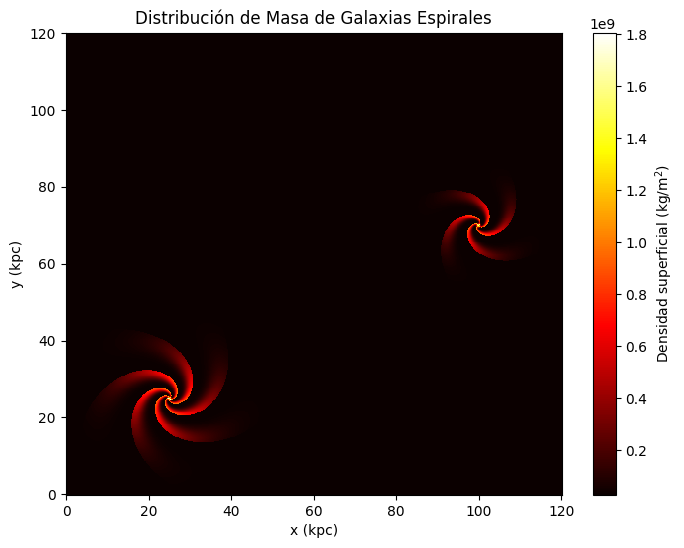

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mass_distributions import generate_spiral_galaxy

# Unidades
kpc = 3.086e19  # metros, 1 kpc en metros

# Parámetros del espacio
Nx, Ny = 500, 500  # Tamaño de la malla
Lx, Ly = 120.0 * kpc, 120.0 * kpc  # Dimensiones físicas del espacio en metros
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  # Pasos espaciales en metros
G = 6.67430e-11  # Constante de gravitación universal en m^3 kg^-1 s^-2

# Inicializar la densidad de masa
rho = np.zeros((Nx, Ny))

# Generar galaxias espirales
rho, x, y = generate_spiral_galaxy(Lx, Ly, Nx, Ny,
    rho, center_x=25 * kpc, center_y=25 * kpc, num_arms=5, arm_spread=1.5, density_peak=1e9,
    decay_rate=0.01, central_mass_peak=1.5e9, background_density=1e7)

rho, x, y = generate_spiral_galaxy(Lx, Ly, Nx, Ny,
    rho, center_x=100 * kpc, center_y=70 * kpc, num_arms=4, arm_spread=1.5, density_peak=1e9,
    decay_rate=0.02, central_mass_peak=1.6e9, background_density=2e7)

# Meshgrid en kpc
x = x / kpc  # Convertir a kpc
y = y / kpc  # Convertir a kpc
X, Y = np.meshgrid(x, y)

# Visualizar la distribución de masa
fig = plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, rho, cmap="hot")
plt.colorbar(label=r"Densidad superficial (kg/m$^2$)")
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Distribución de Masa de Galaxias Espirales")
plt.show()


#### **Método de Jacobi**

La ecuación de Poisson discretizada se resuelve mediante un método iterativo, utilizando actualizaciones sucesivas del potencial gravitatorio hasta alcanzar la convergencia, definida a través de un criterio basado en el **cambio relativo máximo** entre iteraciones consecutivas.

En el **método de Jacobi**, todos los valores nuevos del potencial se calculan **exclusivamente a partir de los valores de la iteración anterior**, por lo que las actualizaciones se realizan de manera **simultánea** en toda la malla.

- Se comienza con una **estimación inicial** del potencial $\Phi$ en toda la malla (típicamente, $\Phi = 0$).

- En cada iteración $k$, el potencial en cada punto interior de la malla se actualiza de acuerdo con la ecuación discretizada:

$$
\Phi_{i,j}^{(k+1)} =
\frac{1}{4}
\left(
\Phi_{i+1,j}^{(k)} +
\Phi_{i-1,j}^{(k)} +
\Phi_{i,j+1}^{(k)} +
\Phi_{i,j-1}^{(k)}
\right)
- \pi G \Delta^2 \rho_{i,j}
$$

- El proceso iterativo se repite hasta que el **cambio relativo máximo** del potencial entre dos iteraciones consecutivas sea menor que una tolerancia predefinida.

El criterio de convergencia se define como:

$$
\epsilon =
\frac{
\max\limits_{i,j}
\left|
\Phi_{i,j}^{(k+1)} - \Phi_{i,j}^{(k)}
\right|
}{
\max\limits_{i,j}
\left|
\Phi_{i,j}^{(k+1)}
\right|
}
$$

La iteración se detiene cuando:

$$
\epsilon < \text{tolerancia}
$$


En la siguiente celda, implemente el método de Jacobi para encontrar el potencial gravitatorio $\Phi(x,y)$, de la distribución de masas definida anteriormente.

In [ ]:
# Aquí!




Ahora grafique el potencial gravitatorio $\Phi(x, y)$ utilizando `plt.pcolormesh` e incluya las líneas de corriente del campo gravitatorio $\vec{g} = -\vec{\nabla} \Phi$ usando `plt.streamplot`.

Recuerde que, el gradiente del potencial gravitatorio en coordenadas cartesianas se escribe como:

$$ \vec{g} = - \vec{\nabla} \Phi = - \left(  \frac{\partial \Phi}{\partial x} , \frac{\partial \Phi}{\partial y} \right) $$

Puede calcular las componentes del campo gravitatorio $\vec{g} = (g_x, g_y)$ como:

$$
\begin{align*}
g_x & = - \frac{\partial \Phi}{\partial x} \approx - \frac{\Phi(x + \Delta x, y) - \Phi(x - \Delta x, y)}{2 \Delta x} = - \frac{\Phi_{i+1, j} - \Phi_{i-1, j}}{2 \Delta x}  \\
g_y & = - \frac{\partial \Phi}{\partial y} \approx - \frac{\Phi(x, y + \Delta y) - \Phi(x, y - \Delta y)}{2 \Delta y} = - \frac{\Phi_{i, j+1} - \Phi_{i, j-1}}{2 \Delta y} 
\end{align*}
$$

#### **Inversión de Ejes al Calcular Derivadas Espaciales**

Cuando trabajamos con un array bidimensional en Python (como un `numpy.array`), los índices de las dimensiones corresponden a los ejes de manera invertida en comparación con las convenciones matemáticas:

- **Filas** ($i$) corresponden al eje **$y$** (dirección vertical).
- **Columnas** ($j$) corresponden al eje **$x$** (dirección horizontal).

Por lo tanto, al calcular las derivadas espaciales:

- Para la **derivada en $x$**, debemos movernos a lo largo de las **columnas** del array.
- Para la **derivada en $y$**, debemos movernos a lo largo de las **filas** del array.

Este cambio en la orientación de los ejes es importante para entender cómo acceder y calcular correctamente las derivadas parciales.

**Ejemplo:**

In [5]:
import numpy as np

# Definir un campo U de ejemplo (matriz 4x5)
U = np.array([
    [0, 2, 4, 6, 8],
    [1, 3, 5, 7, 9],
    [2, 4, 6, 8, 10],
    [3, 5, 7, 9, 11],
])

# Definir el tamaño de los pasos en cada dirección (dx, dy)
dx = dy = 1

# Calcular la derivada en el eje x (a lo largo de las columnas)
dU_dx = (U[:, 2:] - U[:, :-2]) / (2 * dx)

# Calcular la derivada en el eje y (a lo largo de las filas)
dU_dy = (U[2:, :] - U[:-2, :]) / (2 * dy)

# Imprimir las derivadas
print("Derivada en el eje x:")
print(dU_dx)
print("\nDerivada en el eje y:")
print(dU_dy)


Derivada en el eje x:
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]

Derivada en el eje y:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


En la siguiente celda, grafique el potencial y las líneas de campo gravitatorio:

Text(0.5, 0, 'y (kpc)')

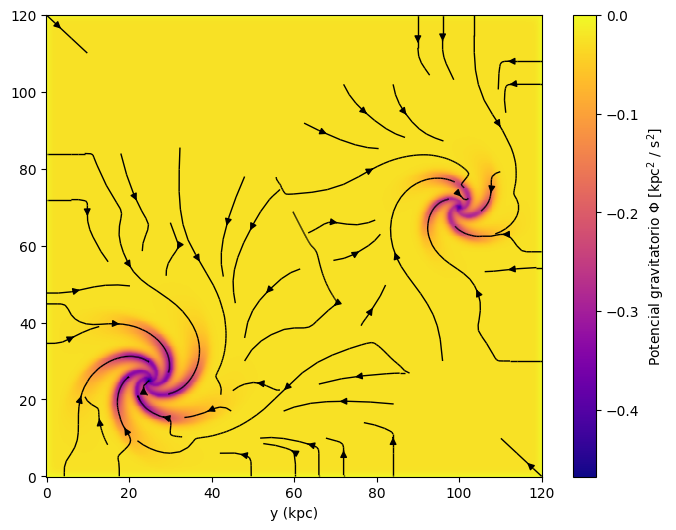

In [ ]:
# Aquí!

# Parámetros del espacio
Nx, Ny = 500, 500  # Tamaño de la malla
Lx, Ly = 120.0 * kpc, 120.0 * kpc  # Dimensiones físicas del espacio en metros
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  # Pasos espaciales en metros
G = 6.67430e-11  # Constante de gravitación universal en m^3 kg^-1 s^-2

gx = phi[] - 

gy = phi[] - 

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Ecuación de Transferencia de Calor**

La ecuación de transferencia de calor, o ecuación de difusión del calor, se expresa como:

$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$

donde:

- $T(x, y, z, t)$ representa la temperatura en función de las coordenadas espaciales $(x, y, z)$ y del tiempo $t$, describiendo su variación en el espacio y el tiempo.
- $\alpha$ es el coeficiente de difusión térmica, determinado por las propiedades del material, como la conductividad térmica $k$, densidad $\rho$ y capacidad calorífica $c_p$:

  $$ \alpha = \frac{k}{\rho c_p} $$

- $\nabla^2$ es el operador Laplaciano, definido en coordenadas cartesianas como:

  $$ \nabla^2 T = \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} $$

Esta ecuación modela cómo la temperatura cambia en un punto debido a la difusión del calor desde los alrededores. Por ejemplo, el cobre, con un $\alpha$ grande, difunde calor rápidamente, mientras que la madera, con un $\alpha$ pequeño, lo hace lentamente.

</div>


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

#### **Ejercicio: Difusión de Calor en una barra (1D)**

En este ejercicio, estudiaremos una barra unidimensional, donde la temperatura $T(x, t)$ varía con el tiempo $t$ y la coordenada espacial $x$. La ecuación de transferencia de calor para este sistema se puede expresar como:

$$ \frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2} $$

En este contexto, resolveremos el problema de transferencia de calor en una barra que se extiende en el dominio $0 < x < L$, donde $L=1$ m es la longitud de la barra.

Consideraremos las siguientes condiciones de contorno de la barra:
    
- temperatura fija de 200 °C en el borde izquierdo de la barra: $T(x=0, t) = 200$ °C
- temperatura fija de 20 °C en el borde derecho de la barra: $T(x=L, t) = 20$ °C

Y la condición inicial:

- temperatura inicial de la barra: $T(x, t=0) = 20$ °C

Para este ejercicio, utilizaremos los siguientes valores del coeficiente de difusión térmica $\alpha$ para los materiales:

- **Cobre:** $\alpha \approx 113 \times 10^{-6} \, \text{m}^2/\text{s}$
- **Hierro:** $\alpha \approx 22.8 \times 10^{-6} \, \text{m}^2/\text{s}$

**Parámetros de simulación:**

- **Tiempo final de simulación ($t_\text{final}$):** 100 s
- **Paso espacial ($\Delta x$):** 0.01 metros
- **Paso temporal ($\Delta t$):** 0.1 segundos

<!-- Estos valores de $\Delta x$ y $\Delta t$ se eligen para garantizar la estabilidad de la simulación y asegurar que la condición de estabilidad de la ecuación de calor sea respetada: $\Delta t < \frac{(\Delta x)^2}{2 \alpha}$. -->
</div>


#### **Discretización de la Ecuación de Calor**

Para discretizar la ecuación de calor, utilizamos diferencias finitas para aproximar las derivadas espaciales y temporales.

Primero, para la segunda derivada espacial, usamos una diferencia finita central:

$$ \frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1, j} + T_{i-1, j} - 2T_{i, j}}{(\Delta x)^2} $$

Esta aproximación nos permite calcular la temperatura $T_{i, j}$ en un punto a partir de los valores de los puntos vecinos $T_{i \pm 1, j}$.

Para la derivada temporal, aplicamos una diferencia hacia adelante (forward difference):

$$ \frac{\partial T}{\partial t} \approx \frac{T_{i, j+1} - T_{i, j}}{\Delta t} $$

Esta elección tiene sentido desde el punto de vista físico, ya que queremos calcular la temperatura futura $T_{i, j+1}$ en función de la temperatura actual $T_{i, j}$.

Combinando ambas aproximaciones, obtenemos:

$$
\frac{T_{i, j+1} - T_{i, j}}{\Delta t} = \alpha \frac{T_{i+1, j} + T_{i-1, j} - 2T_{i, j}}{(\Delta x)^2}
$$

<!-- donde $\alpha$ es la difusividad térmica del material. -->

Finalmente, despejamos $T_{i, j+1}$ para obtener la expresión que usaremos en cada paso temporal:

$$ \boxed{\color{blue}{
T_{i, j+1} = T_{i, j} + \alpha \frac{\Delta t}{(\Delta x)^2} \left( T_{i+1, j} + T_{i-1, j} - 2T_{i, j} \right)}}
$$

Esta ecuación nos permite calcular la temperatura en el siguiente instante $T_{i, j+1}$ utilizando el valor actual $T_{i, j}$ y los valores en los puntos vecinos $T_{i+1, j}$ y $T_{i-1, j}$. De este modo, podemos simular la evolución de la temperatura en una barra a lo largo del tiempo.

El siguiente esquema muestra la discretización en la malla espacial y temporal:

<p align="center">
  <img src="grid_calor_v2.png" width="70%">
</p>


**Solución para el cobre:**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros espaciales
L = 1.0  # Longitud de la barra en metros
dx = 0.01  # Paso espacial en metros
Nx = int(L / dx) + 1  # Número de puntos en el dominio espacial

# Parámetros temporales
tf = 300  # Tiempo final de simulación en segundos
dt = 0.1  # Paso temporal en segundos
Nt = int(tf / dt) + 1  # Número de pasos en el dominio temporal

# Coeficiente de difusión térmica
alpha = 113e-6  # Coeficiente de difusión térmica en m^2/s


# Inicializar el arreglo de temperatura con condiciones iniciales y de contorno
T = np.zeros((Nt, Nx))  # Arreglo bidimensional para almacenar la temperatura
T[0, :] = 20.0   # Condición inicial en toda la barra (20 °C)
T[:, 0] = 200.0  # Condición de contorno en el extremo izquierdo (200 °C)
T[:, -1] = 20.0  # Condición de contorno en el extremo derecho (20 °C)

# Simulación de la difusión de calor
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        T[n + 1, i] = T[n, i] + alpha * dt / dx**2 * (T[n, i + 1] - 2 * T[n, i] + T[n, i - 1])

#### **Representaciones de la solución:**

**1. Líneas en un 3D plot:**

In [ ]:
# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear ejes
x = np.linspace(0, L, Nx)
t = np.linspace(0, tf, Nt)

# Graficar múltiples líneas en el tiempo
for n in range(0, Nt, int(Nt/5)):  # Selecciona aproximadamente 20 líneas para graficar
    ax.plot(x, t[n] * np.ones_like(x), T[n, :], label=f't={t[n]:.1f} s')

# Etiquetas y título
ax.set_xlabel("Posición en la barra (m)")
ax.set_ylabel("Tiempo (s)")
ax.set_zlabel("Temperatura (°C)")
ax.set_title("Evolución de la temperatura en la barra a lo largo del tiempo")

ax.legend()

plt.show()


**2. Imshow:**
- eje horizontal: posición x.
- eje verical: tiempo t

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(T, aspect='auto', cmap='hot', extent=[0, L, 0, tf], origin='lower', interpolation="spline16")
plt.colorbar(label="Temperatura (°C)")
plt.xlabel("Posición en la barra (m)")
plt.ylabel("Tiempo (s)")
plt.title("Evolución de la temperatura en la barra a lo largo del tiempo")
plt.show()


**3. Contourf:**

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(x, t, T, cmap='hot')
plt.colorbar(label="Temperatura (°C)")
plt.xlabel("Posición en la barra (m)")
plt.ylabel("Tiempo (s)")
plt.title("Contornos de la temperatura a lo largo del tiempo")
plt.show()


**4. Barras: bins**

In [ ]:
# Número de bins (intervalos de tiempo)
n_bins = 10
bin_edges = np.linspace(0, tf, n_bins + 1)

# Crear un array para almacenar los promedios de cada bin
T_binned = np.zeros((n_bins, Nx))

# Calcular el promedio para cada bin
for i in range(n_bins):
    t_start = bin_edges[i]
    t_end = bin_edges[i + 1]
    
    # Obtener los índices en la matriz T correspondientes al intervalo de tiempo [t_start, t_end)
    indices_bin = np.where((t >= t_start) & (t < t_end))[0]
    
    # Promediar los valores de T a lo largo del tiempo para este intervalo, en cada posición x
    T_binned[i, :] = np.mean(T[indices_bin, :], axis=0)

# Niveles para el contourf (4 niveles, 5 colores)
levels = np.linspace(T.min(), T.max(), 6)

# Crear los subplots (uno adicional para el tiempo inicial t=0)
fig, axs = plt.subplots(n_bins + 1, 1, figsize=(10, 0.5 * (n_bins + 1)), sharex=True)
fig.suptitle("Evolución de la temperatura en intervalos de tiempo promedio")

# Graficar la configuración inicial en t = 0 duplicando los valores en el eje del tiempo
T_initial = np.vstack([T[0, :], T[0, :]])  # Duplicamos para crear una barra constante en el eje vertical
initial_plot = axs[0].contourf(x, [0, dt], T_initial, levels=levels, cmap='hot')
axs[0].set_ylabel("t=0 s", rotation=0, labelpad=15)
axs[0].set_yticks([])

# Generar un heatmap individual para cada intervalo de tiempo promedio
for i in range(n_bins):
    # Tiempo promedio del intervalo
    promedio_tiempo = (bin_edges[i] + bin_edges[i + 1]) / 2
    
    # Duplicar valores en el eje vertical para cada bin
    T_bin_plot = np.vstack([T_binned[i, :], T_binned[i, :]])
    axs[i + 1].contourf(x, [promedio_tiempo - dt/2, promedio_tiempo + dt/2], T_bin_plot, levels=levels, cmap='hot')
    axs[i + 1].set_ylabel(f"{promedio_tiempo:.0f} s", rotation=0, labelpad=15)
    axs[i + 1].set_yticks([])

# Crear la barra de color
cbar = fig.colorbar(initial_plot, ax=axs, orientation="horizontal", fraction=0.05, pad=0.1, label="T [°C]")

# Establecer los ticks en el centro de cada color (medias entre los niveles)
ticks = (levels[:-1] + levels[1:]) / 2  # Calcula los valores medios entre cada par de niveles
cbar.set_ticks(ticks)

# Opcional: Establecer las etiquetas de los ticks si lo deseas
cbar.set_ticklabels([f"{tick:.0f}" for tick in ticks])

# Ajustar manualmente la posición de la colorbar si es necesario
cbar.ax.set_position([0.15, -0.1, 0.7, 0.03])  # Ajustar la posición según lo necesites

# Etiquetas y ajustes finales
axs[-1].set_xlabel("Posición en la barra (m)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Comparación hierro y cobre:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros espaciales
L = 1.0  # Longitud de la barra en metros
dx = 0.01  # Paso espacial en metros
Nx = int(L / dx) + 1  # Número de puntos en el dominio espacial

# Parámetros temporales
tf = 300  # Tiempo final de simulación en segundos
dt = 0.1  # Paso temporal en segundos
Nt = int(tf / dt) + 1  # Número de pasos en el dominio temporal

# Coeficiente de difusión térmica
alpha_cobre = 113e-6  # Coeficiente de difusión térmica en m^2/s
alpha_hierro = 22.8e-6 

# Inicializar el arreglo de temperatura para cobre e hierro
T_cobre = np.zeros((Nt, Nx))  # Arreglo para cobre
T_hierro = np.zeros((Nt, Nx))  # Arreglo para hierro

# Condiciones iniciales y de contorno
T_cobre[0, :] = 20.0  # Condición inicial en toda la barra (20 °C)
T_hierro[0, :] = 20.0  # Condición inicial en toda la barra (20 °C)
T_cobre[:, 0] = 200.0  # Condición de contorno en el extremo izquierdo (200 °C)
T_hierro[:, 0] = 200.0  # Condición de contorno en el extremo izquierdo (200 °C)
T_cobre[:, -1] = 20.0  # Condición de contorno en el extremo derecho (20 °C)
T_hierro[:, -1] = 20.0  # Condición de contorno en el extremo derecho (20 °C)

# Simulación de la difusión de calor para cobre
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        T_cobre[n + 1, i] = T_cobre[n, i] + alpha_cobre * dt / dx**2 * (T_cobre[n, i + 1] - 2 * T_cobre[n, i] + T_cobre[n, i - 1])

# Simulación de la difusión de calor para hierro
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        T_hierro[n + 1, i] = T_hierro[n, i] + alpha_hierro * dt / dx**2 * (T_hierro[n, i + 1] - 2 * T_hierro[n, i] + T_hierro[n, i - 1])

# Número de bins (intervalos de tiempo)
n_bins = 10
bin_edges = np.linspace(0, tf, n_bins + 1)

# Crear un array para almacenar los promedios de cada bin para cobre e hierro
T_binned_cobre = np.zeros((n_bins, Nx))
T_binned_hierro = np.zeros((n_bins, Nx))

# Calcular el promedio para cada bin
for i in range(n_bins):
    t_start = bin_edges[i]
    t_end = bin_edges[i + 1]
    
    # Obtener los índices en la matriz T correspondientes al intervalo de tiempo [t_start, t_end)
    indices_bin = np.where((t >= t_start) & (t < t_end))[0]
    
    # Promediar los valores de T a lo largo del tiempo para este intervalo, en cada posición x
    T_binned_cobre[i, :] = np.mean(T_cobre[indices_bin, :], axis=0)
    T_binned_hierro[i, :] = np.mean(T_hierro[indices_bin, :], axis=0)

# Niveles para el contourf (4 niveles, 5 colores)
levels = np.linspace(min(np.min(T_cobre), np.min(T_hierro)), max(np.max(T_cobre), np.max(T_hierro)), 6)

# Crear los subplots (dos columnas: una para cobre y una para hierro)
fig, axs = plt.subplots(n_bins + 1, 2, figsize=(12, 0.5 * (n_bins + 1)), sharex=True)

fig.suptitle("Evolución de la temperatura en intervalos de tiempo promedio")

# Graficar la configuración inicial en t = 0 duplicando los valores en el eje del tiempo
T_initial_cobre = np.vstack([T_cobre[0, :], T_cobre[0, :]])  # Duplicamos para crear una barra constante en el eje vertical
T_initial_hierro = np.vstack([T_hierro[0, :], T_hierro[0, :]])  # Duplicamos para crear una barra constante en el eje vertical

# Inicial para cobre
axs[0, 0].contourf(x, [0, dt], T_initial_cobre, levels=levels, cmap='hot')
axs[0, 0].set_ylabel("t=0 s", rotation=0, labelpad=15)
axs[0, 0].set_yticks([])

# Inicial para hierro
axs[0, 1].contourf(x, [0, dt], T_initial_hierro, levels=levels, cmap='hot')
axs[0, 1].set_ylabel("t=0 s", rotation=0, labelpad=15)
axs[0, 1].set_yticks([])

# Generar un heatmap individual para cada intervalo de tiempo promedio para cobre e hierro
for i in range(n_bins):
    promedio_tiempo = (bin_edges[i] + bin_edges[i + 1]) / 2
    
    # Duplicar valores en el eje vertical para cada bin
    T_bin_plot_cobre = np.vstack([T_binned_cobre[i, :], T_binned_cobre[i, :]])
    T_bin_plot_hierro = np.vstack([T_binned_hierro[i, :], T_binned_hierro[i, :]])
    
    axs[i + 1, 0].contourf(x, [promedio_tiempo - dt / 2, promedio_tiempo + dt / 2], T_bin_plot_cobre, levels=levels, cmap='hot')
    axs[i + 1, 0].set_ylabel(f"{promedio_tiempo:.0f} s", rotation=0, labelpad=15)
    axs[i + 1, 0].set_yticks([])

    axs[i + 1, 1].contourf(x, [promedio_tiempo - dt / 2, promedio_tiempo + dt / 2], T_bin_plot_hierro, levels=levels, cmap='hot')
    axs[i + 1, 1].set_ylabel(f"{promedio_tiempo:.0f} s", rotation=0, labelpad=15)
    axs[i + 1, 1].set_yticks([])

# Crear la barra de color
cbar = fig.colorbar(axs[0, 0].contourf(x, [0, dt], T_initial_cobre, levels=levels, cmap='hot'), ax=axs, orientation="horizontal", fraction=0.05, pad=0.1, label="T [°C]")

# Establecer los ticks en el centro de cada color (medias entre los niveles)
ticks = (levels[:-1] + levels[1:]) / 2  # Calcula los valores medios entre cada par de niveles
cbar.set_ticks(ticks)

# Opcional: Establecer las etiquetas de los ticks si lo deseas
cbar.set_ticklabels([f"{tick:.0f}" for tick in ticks])

# Ajustar manualmente la posición de la colorbar si es necesario
cbar.ax.set_position([0.15, -0.1, 0.7, 0.03])  # Ajustar la posición según lo necesites

# Etiquetas y ajustes finales
axs[-1, 0].set_xlabel("Posición en la barra (m)")
axs[-1, 1].set_xlabel("Posición en la barra (m)")

axs[0, 0].set_title(r"Barra de Cobre: $\alpha=113 \times 10^{-6}$")
axs[0, 1].set_title(r"Barra de Hierro: $\alpha=22.8 \times 10^{-6}$")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### **Análisis de Estabilidad de Von Neumann**

¿Estarían de acuerdo si les digo que se debe cumplir con la siguiente relación para encontrar una solución estable a la ecuación de Calor?

$$ \Delta t \leq \frac{(\Delta x)^2}{2 \alpha} $$

Modifique y defina $\Delta x = 0.01$ m y $\Delta t = 0.44515$ s para estudiar este fenómeno.

<!-- ¿Que pasaría si queremos estudiar materiales con un $\alpha$ extremadamente alto, como por ejemplo, el gas de hidrógeno?

$\alpha_{H_2} = 6100 \times 10^{-6}$ -->



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros espaciales
L = 1.0  # Longitud de la barra en metros
dx =   # Paso espacial en metros
Nx = int(L / dx) + 1  # Número de puntos en el dominio espacial

# Parámetros temporales
tf = 300  # Tiempo final de simulación en segundos
dt =   # Paso temporal en segundos  #0.44515
Nt = int(tf / dt) + 1  # Número de pasos en el dominio temporal

# Coeficiente de difusión térmica
alpha = 113e-6  # Coeficiente de difusión térmica en m^2/s

# Inicializar el arreglo de temperatura con condiciones iniciales y de contorno
T = np.zeros((Nt, Nx))  # Arreglo bidimensional para almacenar la temperatura
T[0, :] = 20.0   # Condición inicial en toda la barra (20 °C)
T[:, 0] = 200.0  # Condición de contorno en el extremo izquierdo (200 °C)
T[:, -1] = 20.0  # Condición de contorno en el extremo derecho (20 °C)

# Simulación de la difusión de calor
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        T[n + 1, i] = T[n, i] + alpha * dt / dx**2 * (T[n, i + 1] - 2 * T[n, i] + T[n, i - 1])

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear ejes
x = np.linspace(0, L, Nx)
t = np.linspace(0, tf, Nt)

# Graficar múltiples líneas en el tiempo
for n in range(0, Nt, int(Nt/5)):  # Selecciona aproximadamente 20 líneas para graficar
    ax.plot(x, t[n] * np.ones_like(x), T[n, :], label=f't={t[n]:.1f} s')

# Etiquetas y título
ax.set_xlabel("Posición en la barra (m)")
ax.set_ylabel("Tiempo (s)")
ax.set_zlabel("Temperatura (°C)")
ax.set_title("Evolución de la temperatura en la barra a lo largo del tiempo")

ax.legend()

plt.show()

In [ ]:
print(dt)

In [ ]:
print(dx**2/(2*alpha))

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(x, t, T, cmap='hot')
plt.colorbar(label="Temperatura (°C)")
plt.xlabel("Posición en la barra (m)")
plt.ylabel("Tiempo (s)")
plt.title("Contornos de la temperatura a lo largo del tiempo")
plt.show()


<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:**

En esta jornada, nos enfocamos en la resolución de ecuaciones en derivadas parciales (EDP) aplicadas a fenómenos físicos. Una de ellas fue la ecuación de Poisson, la cual resolvimos en el contexto de distribución de masa de galaxias, ecuación de dependencia espacial. Luego, exploramos la ecuación de calor en una barra 1D, aplicando el método de diferencias finitas para modelar la difusión térmica a lo largo del tiempo y la posición.

<!-- Finalmente, realizamos un análisis de estabilidad utilizando el método de Von Neumann, esencial para comprender el comportamiento y la precisión de las soluciones numéricas en estos problemas, especialmente en lo que respecta a la estabilidad temporal en la ecuación de calor. -->

**Próxima clase:** Series y Transformada de Fourier
</div>


<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional IV para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>
